In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
DATA_PATH = "/content/drive/MyDrive/멀티캠퍼스 9회차 I반/06머신러닝/human_activity/human_activity"

FEATURE_NAME_PATH = DATA_PATH  + "/features.txt"
TRAIN_FEATURE_PATH =  DATA_PATH + "/train/X_train.txt"
TRAIN_LABEL_PATH = DATA_PATH + "/train/y_train.txt"

TEST_FEATURE_PATH = DATA_PATH + "/test/X_test.txt"
TEST_LABEL_PATH = DATA_PATH + "/test/y_test.txt"

In [4]:
import pandas as pd

def get_human_dataset( ):

    def get_new_feature_name_df(old_feature_name_df):
      feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
      feature_dup_df = feature_dup_df.reset_index()
      new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
      new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0],  axis=1)
      new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
      return new_feature_name_df

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(FEATURE_NAME_PATH, sep='\s+', header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv(TRAIN_FEATURE_PATH,sep='\s+', names=feature_name )
    X_test = pd.read_csv(TEST_FEATURE_PATH,sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv(TRAIN_LABEL_PATH,sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv(TEST_LABEL_PATH,sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators' : [30, 50],
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [30, 50]}, scoring='accuracy')

In [42]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# max_depth,min_samples_split 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,30,0.911456
1,50,0.915263


In [43]:
best = rf_grid_search.best_estimator_

print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(rf_grid_search.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', rf_grid_search.best_params_)
best.score(X_test,y_test)

GridSearchCV 최고 평균 정확도 수치:0.9153
GridSearchCV 최적 하이퍼 파라미터: {'n_estimators': 50}


0.9243298269426535

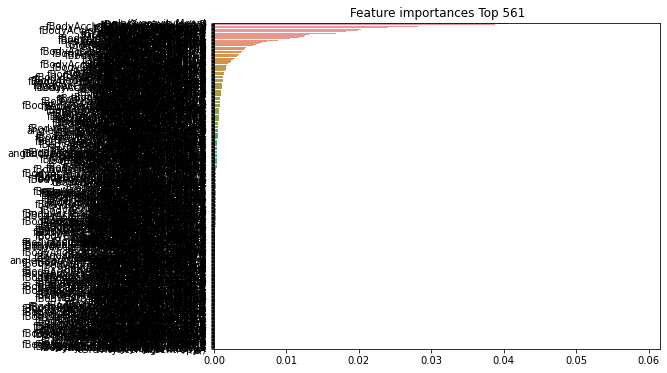

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(model, columns, limit=None):
 
  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()
plot_feature_importance(rf_grid_search.best_estimator_, X_train.columns)

# random forest의 특성중요도!⭐⭐⭐

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators' : [30,50],
    'max_depth' : [5, 20],
    "min_samples_split" : [10,30]

}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=5
)

rf_grid_search.fit(X_train, y_train)

# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# max_depth,min_samples_split 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_n_estimators','param_max_depth',"param_min_samples_split", 'mean_test_score']]

,param_n_estimators,param_max_depth,param_min_samples_split,mean_test_score
0,30,5,10,0.904110
1,50,5,10,0.905879
2,30,5,30,0.906150
3,50,5,30,0.908463
4,30,20,10,0.918802
5,50,20,10,0.918666
6,30,20,30,0.916762
7,50,20,30,0.914040


In [39]:
best = rf_grid_search.best_estimator_


print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(rf_grid_search.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', rf_grid_search.best_params_)
best.score(X_test,y_test)

GridSearchCV 최고 평균 정확도 수치:0.9188
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 30}


0.9233118425517476

In [40]:
best

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=30,
                       random_state=42)